
# Analysis of Pokemon dataset

The data was sourced from the [Pokedex](https://www.kaggle.com/datasets/noeyislearning/pokdex).




## 1. Data preprocessing

As part of the initial processing of the data, the following steps were performed:
- We removed the No. and Abilities columns due to the fact that we will not need them;
- We merged all the csv files together into a single data source and put it in the cloud for easier access;

## 2. Overall statistics analysis and visualization

Load necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from hashlib import md5
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error


sns.set_theme()

Load data frame

In [2]:
df = pd.read_csv('https://s1202077.blob.core.windows.net/wiad-2025/pokemon.csv', index_col = 0)
df.head()

,Name,Type,HP,Att,Def,S.Att,S.Def,Spd,Generation,Label Type
0,Caterpie,bug,45,30,35,20,20.0,45,bw,0
1,Metapod,bug,50,20,55,25,25.0,30,bw,0
2,Butterfree,"bug, flying",60,45,50,80,80.0,70,bw,6
3,Weedle,"bug, poison",40,35,30,20,20.0,50,bw,10
4,Kakuna,"bug, poison",45,25,50,25,25.0,35,bw,10


Explanation of generation abbreviation

In [3]:
pd.DataFrame([{
    'bw': 'Black & White',
    'dp': 'Diamond & Pearl',
    'gs': 'Gold & Silver',
    'rb': 'Red & Blue',
    'rs': 'Ruby & Sapphire',
    'sm': 'Sun & Moon',
    'sv': 'Scarlet & Violet',
    'swsh': 'Sword & Shield',
    'xy': 'X & Y'
}])

,bw,dp,gs,rb,rs,sm,sv,swsh,xy
0,Black & White,Diamond & Pearl,Gold & Silver,Red & Blue,Ruby & Sapphire,Sun & Moon,Scarlet & Violet,Sword & Shield,X & Y


In [4]:
pd.set_option('display.max_rows', 1000)
df[df['Name'] == 'Clefairy']

,Name,Type,HP,Att,Def,S.Att,S.Def,Spd,Generation,Label Type
575,Clefairy,normal,70,45,48,60,65.0,35,bw,144
1408,Clefairy,normal,70,45,48,60,65.0,35,dp,144
1933,Clefairy,normal,70,45,48,60,65.0,35,gs,144
2129,Clefairy,normal,70,45,48,60,NaN,35,rb,144
2216,Clefairy,normal,70,45,48,60,NaN,35,rb,144
2618,Clefairy,normal,70,45,48,60,65.0,35,rs,144
3156,Clefairy,fairy,70,45,48,60,65.0,35,sm,58
4584,Clefairy,fairy,70,45,48,60,65.0,35,sv,58
5900,Clefairy,fairy,70,45,48,60,65.0,35,swsh,58
7351,Clefairy,fairy,70,45,48,60,65.0,35,xy,58


Normalize types i.e. `psychic, fairy` should be treated the same as `fairy, psychic`

In [5]:
def normalize_types(values):
  return ', '.join(sorted(set(values.split(', '))))

df['Type'] = df['Type'].apply(normalize_types)

In [6]:
df.describe()

,HP,Att,Def,S.Att,S.Def,Spd,Label Type
count,8321.000000,8321.000000,8321.000000,8321.000000,8101.000000,8321.000000,8321.000000
mean,70.585987,78.925129,74.816969,72.951568,72.640538,68.931979,118.959140
std,26.606726,30.563904,30.772955,31.120925,27.866718,28.618897,66.380436
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,63.000000
50%,68.000000,77.000000,70.000000,68.000000,70.000000,67.000000,126.000000
75%,85.000000,100.000000,91.000000,95.000000,90.000000,90.000000,173.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,220.000000


The total number of Pokémon

In [7]:
len(df["Name"].unique())

1028

Overall statistics

In [8]:
df.agg({
    'HP': ['min', 'mean', 'max'],
    'Att': ['min', 'mean', 'max'],
    'Def': ['min', 'mean', 'max'],
    'S.Att': ['min', 'mean', 'max'],
    'S.Def': ['min', 'mean', 'max'],
    'Spd': ['min', 'mean', 'max']
})

,HP,Att,Def,S.Att,S.Def,Spd
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
mean,70.585987,78.925129,74.816969,72.951568,72.640538,68.931979
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


Statistics per Generation

In [9]:
df.groupby(['Generation']).agg({
    'HP': ['min', 'mean', 'max'],
    'Att': ['min', 'mean', 'max'],
    'Def': ['min', 'mean', 'max'],
    'S.Att': ['min', 'mean', 'max'],
    'S.Def': ['min', 'mean', 'max'],
    'Spd': ['min', 'mean', 'max']
})

HP                 Att                 Def                 S.Att  \
           min       mean  max min       mean  max min       mean  max   min   
Generation                                                                     
bw           1  69.959759  255   5  77.384306  170   5  73.457746  230    10   
dp           1  68.970667  255   5  75.353333  165   5  73.382667  230    10   
gs          10  66.548476  255   5  71.285319  134   5  70.554017  230    10   
rb          10  65.018182  250   5  72.568182  134   5  69.654545  180    20   
rs           1  66.159785  255   5  72.504488  160   5  70.301616  230    10   
sm           1  71.066758  255   5  82.197522  190   5  77.262904  230    10   
sv          10  74.086991  255   5  82.294671  170   5  75.349530  200    10   
swsh         1  72.101249  255   5  80.577909  181   5  76.733070  250    10   
xy           1  70.174937  255   5  79.240538  190   5  75.211102  230    10   

                           S.Def                   Spd                  
                 mean  max   min       mean    max min       mean  max  
Generation                                                              
bw          71.443662  170  20.0  71.167002  230.0   5  67.903421  160  
dp          70.757333  154  20.0  71.638667  230.0   5  67.322667  160  
gs          66.858726  154  20.0  69.171745  230.0   5  65.963989  140  
rb          70.872727  154   NaN        NaN    NaN  15  67.631818  140  
rs          67.366248  154  20.0  68.305206  230.0   5  64.727110  160  
sm          75.562973  194  20.0  74.348245  230.0   5  70.197522  180  
sv          75.401254  170  20.0  73.874608  200.0   5  71.917712  200  
swsh        73.792242  173  20.0  73.648258  250.0   5  69.117028  200  
xy          73.551724  194  20.0  72.888141  230.0   5  68.931034  160

Pokémon statistics per generation

In [10]:
categories = ['HP', 'Att', 'Def', 'S.Att', 'S.Def', 'Spd']

df.groupby('Generation')[['HP', 'Att', 'Def', 'S.Att', 'S.Def', 'Spd']].aggregate(['mean', 'min', 'max'])
df_mean = df.groupby('Generation')[['HP', 'Att', 'Def', 'S.Att', 'S.Def', 'Spd']].aggregate(['mean'])

df_means_bw = df_mean.iloc[0].values
df_means_dp = df_mean.iloc[1].values
df_means_gs = df_mean.iloc[2].values
df_means_rb = df_mean.iloc[3].values
df_means_rs = df_mean.iloc[4].values
df_means_sm = df_mean.iloc[5].values
df_means_sv = df_mean.iloc[6,].values
df_means_swsh = df_mean.iloc[7].values
df_means_xy = df_mean.iloc[8].values


fig = go.Figure()


fig.add_trace(go.Scatterpolar(
    r=df_means_bw,
    theta=categories,
    fill='toself',
    name='bw'
))

fig.add_trace(go.Scatterpolar(
    r=df_means_dp,
    theta=categories,
    fill='toself',
    name='dp'
))

fig.add_trace(go.Scatterpolar(
    r=df_means_gs,
    theta=categories,
    fill='toself',
    name='gs'
))

fig.add_trace(go.Scatterpolar(
    r=df_means_rb,
    theta=categories,
    fill='toself',
    name='rb'
))

fig.add_trace(go.Scatterpolar(
    r=df_means_rs,
    theta=categories,
    fill='toself',
    name='rs'
))

fig.add_trace(go.Scatterpolar(
    r=df_means_sm,
    theta=categories,
    fill='toself',
    name='sm'
))

fig.add_trace(go.Scatterpolar(
    r=df_means_sv,
    theta=categories,
    fill='toself',
    name='sv'
))

fig.add_trace(go.Scatterpolar(
    r=df_means_swsh,
    theta=categories,
    fill='toself',
    name='swsh'
))

fig.add_trace(go.Scatterpolar(
    r=df_means_xy,
    theta=categories,
    fill='toself',
    name='xy'
))


fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[65, 85]
        )
    ),
    showlegend=True,
    title="Interactive Multiple Trace Radar Chart"
)

fig.show()

Visualization of mean values of stats per generation

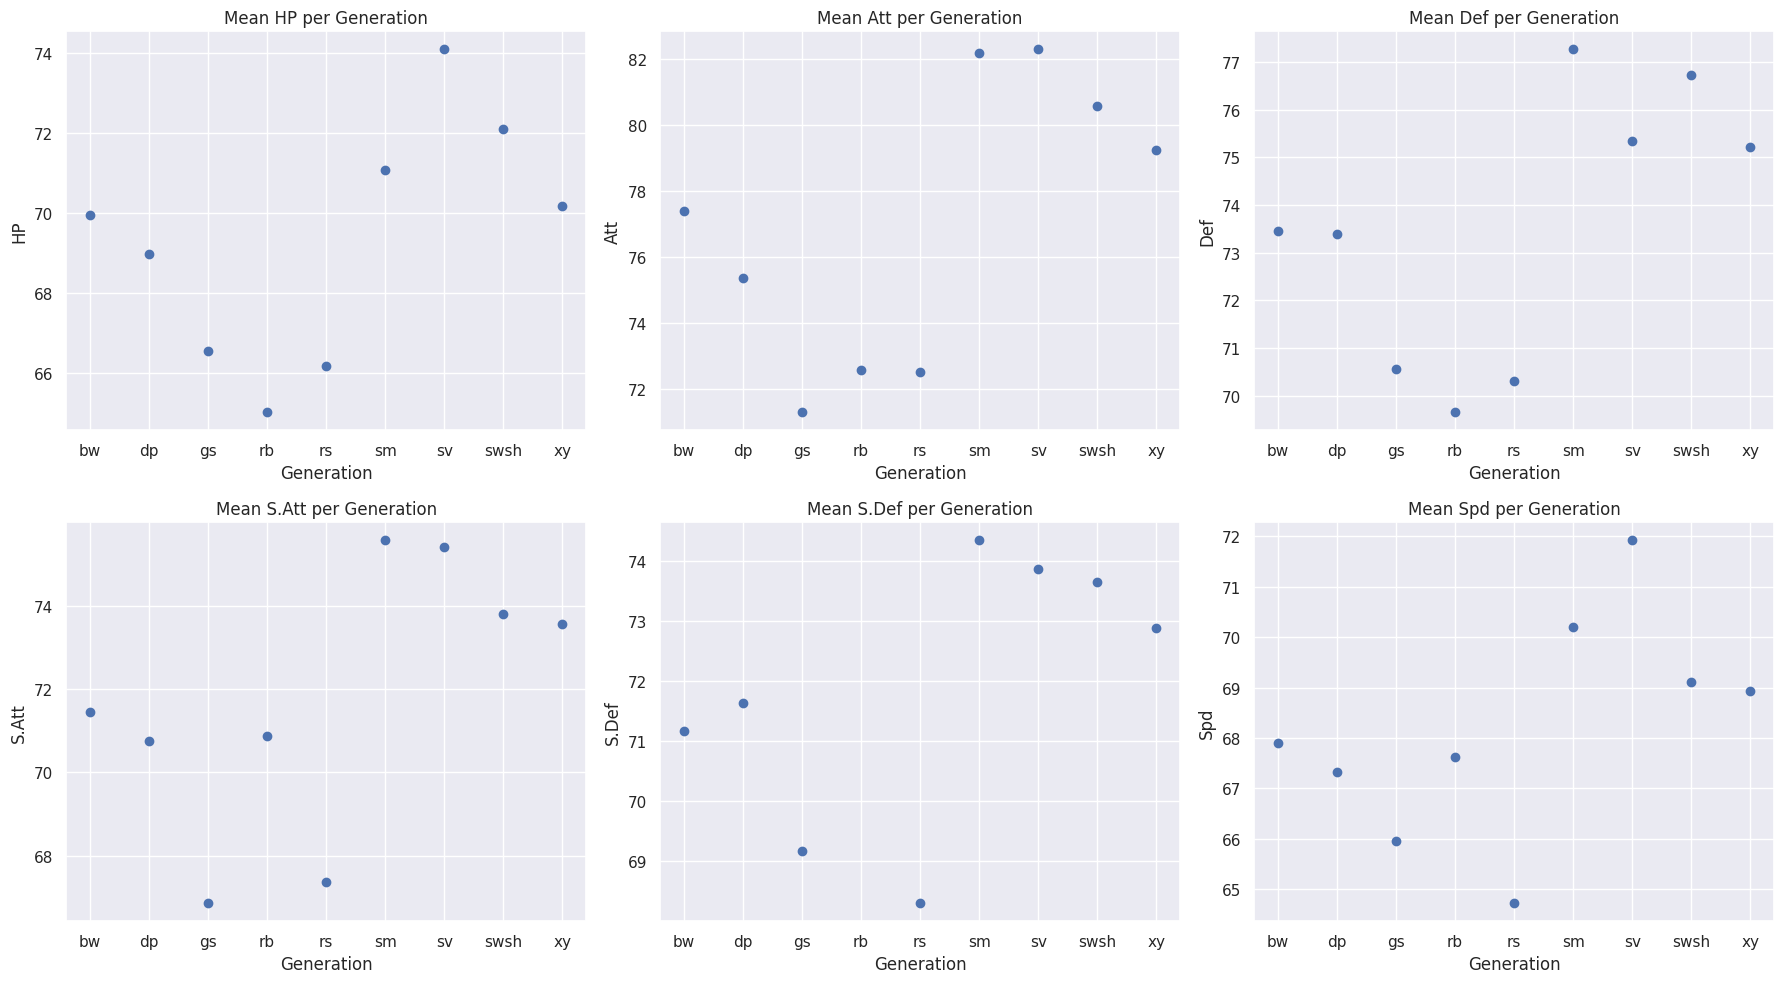

In [11]:
mean_stats = df.groupby('Generation')[['HP', 'Att', 'Def', 'S.Att', 'S.Def', 'Spd']].mean().reset_index()

stats = ['HP', 'Att', 'Def', 'S.Att', 'S.Def', 'Spd']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for idx, stat in enumerate(stats):
    ax = axes[idx]
    ax.scatter(mean_stats['Generation'], mean_stats[stat])
    ax.set_title(f'Mean {stat} per Generation')
    ax.set_xlabel('Generation')
    ax.set_ylabel(f'{stat}')
    ax.grid(True)

plt.tight_layout()
plt.show()

Pokémon that have appeared in every generation

In [12]:
gens = df['Generation'].unique()
df_grouped = df.groupby(['Name'])['Generation'].nunique()

pokemon_in_all_gens = df_grouped[df_grouped == len(gens)].index

print(f'Pokemon that exist in all generations ({len(pokemon_in_all_gens)}):')
print(pokemon_in_all_gens.to_list())

Pokemon that exist in all generations (99):
['Arbok', 'Arcanine', 'Articuno', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Koffing', 'Lapras', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Meowth', 'Mew', 'Mewtwo', 'Moltres', 'Muk', 'Ninetales', 'Oddish', 'Persian', 'Pikachu', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Porygon', 'Primeape', 'Psyduck', 'Raichu', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scyther', 'Seadra', 'Seel', 'Shellder', 'Slowbro', 'Slowpoke', 'Snorlax', 'Squirtle', 'Tauros', 'Tentacool

Pokémon that exist in only one generation

In [13]:
pokemon_in_only_one_gen = df_grouped[df_grouped == 1].index
print(f'Pokemon that exist in only one generation ({len(pokemon_in_only_one_gen)}):')
print(pokemon_in_only_one_gen.to_list())

Pokemon that exist in only one generation (146):
['Annihilape', 'Arboliva', 'Archaludon', 'Arctibax', 'Arctovish', 'Arctozolt', 'Armarouge', 'Baxcalibur', 'Bellibolt', 'Blipbug', 'Boltund', 'Bombirdier', 'Brambleghast', 'Bramblin', 'Brute Bonnet', 'Capsakid', 'Centiskorch', 'Ceruledge', 'Cetitan', 'Cetoddle', 'Charcadet', 'Chi-Yu', 'Chien-Pao', 'Clobbopus', 'Clodsire', 'Crocalor', 'Cursola', 'Cyclizar', 'Dachsbun', 'Dipplin', 'Dolliv', 'Dondozo', 'Dottler', 'Dracovish', 'Dracozolt', 'Dubwool', 'Dudunsparce', 'Eldegoss', 'Espathra', 'Farigiraf', 'Fezandipiti', 'Fidough', 'Finizen', 'Flamigo', 'Flittle', 'Floragato', 'Flutter Mane', 'Frigibax', 'Fuecoco', 'Garganacl', 'Gholdengo', 'Gimmighoul', 'Glimmet', 'Glimmora', 'Gossifleur', 'Gouging Fire', 'Grafaiai', 'Grapploct', 'Great Tusk', 'Greavard', 'Houndstone', 'Hydrapple', 'Iron Boulder', 'Iron Bundle', 'Iron Crown', 'Iron Hands', 'Iron Jugulis', 'Iron Leaves', 'Iron Moth', 'Iron Thorns', 'Iron Treads', 'Iron Valiant', 'Kilowattrel', 'Ki

Distribution of Pokémon by generation

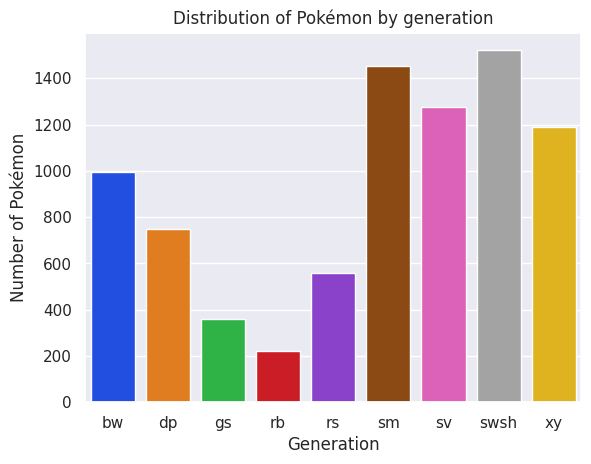

In [14]:
gen_count = df.groupby(['Generation']).Generation.count().reset_index(name='Count')


palette = sns.color_palette("bright", len(gen_count))


bar_generation = sns.barplot(data=gen_count, x='Generation', y='Count', hue='Generation', palette=palette, dodge=False)

bar_generation.set_xlabel('Generation')
bar_generation.set_ylabel('Number of Pokémon')
bar_generation.set_title('Distribution of Pokémon by generation')

plt.show()


Number of Pokémon that have different types in different gens

In [15]:
df_grouped = df.groupby(['Name'])
df_grouped = df_grouped['Type'].nunique()
diff_types_in_one_gen = df_grouped[df_grouped > 1].index

print(df[df['Name'].isin(diff_types_in_one_gen)][['Name', 'Type']])
print(f'Number of pokemon that have different types in different gens: {len(diff_types_in_one_gen)}')

          Name             Type
11      Pinsir              bug
39    Wormadam       bug, grass
40    Wormadam      bug, ground
41    Wormadam       bug, steel
47      Arceus              bug
...        ...              ...
8242  Qwilfish    poison, water
8243   Corsola      rock, water
8288     Rotom  electric, water
8292    Arceus            water
8295  Samurott            water

[1535 rows x 2 columns]
Number of pokemon that have different types in different gens: 103


Pokémon with unique types across generations

In [16]:
df_uniq_names = df.drop_duplicates(subset = ['Name'])

by_type = df_uniq_names['Type'].value_counts()
unique_types = by_type[by_type == 1].index.to_list()

print('Pokemon with unique types across generations')
df_uniq_names[df_uniq_names['Type'].isin(unique_types)][['Name', 'Type']]

Pokemon with unique types across generations


,Name,Type
29,Nincada,"bug, ground"
31,Shedinja,"bug, ghost"
71,Tyranitar,"dark, rock"
166,Rotom,"electric, ghost"
223,Terrakion,"fighting, rock"
261,Heatran,"fire, steel"
382,Froslass,"ghost, ice"
634,Bibarel,"normal, water"
857,Empoleon,"steel, water"
3267,Crabominable,"fighting, ice"


Distribution of Pokémon types



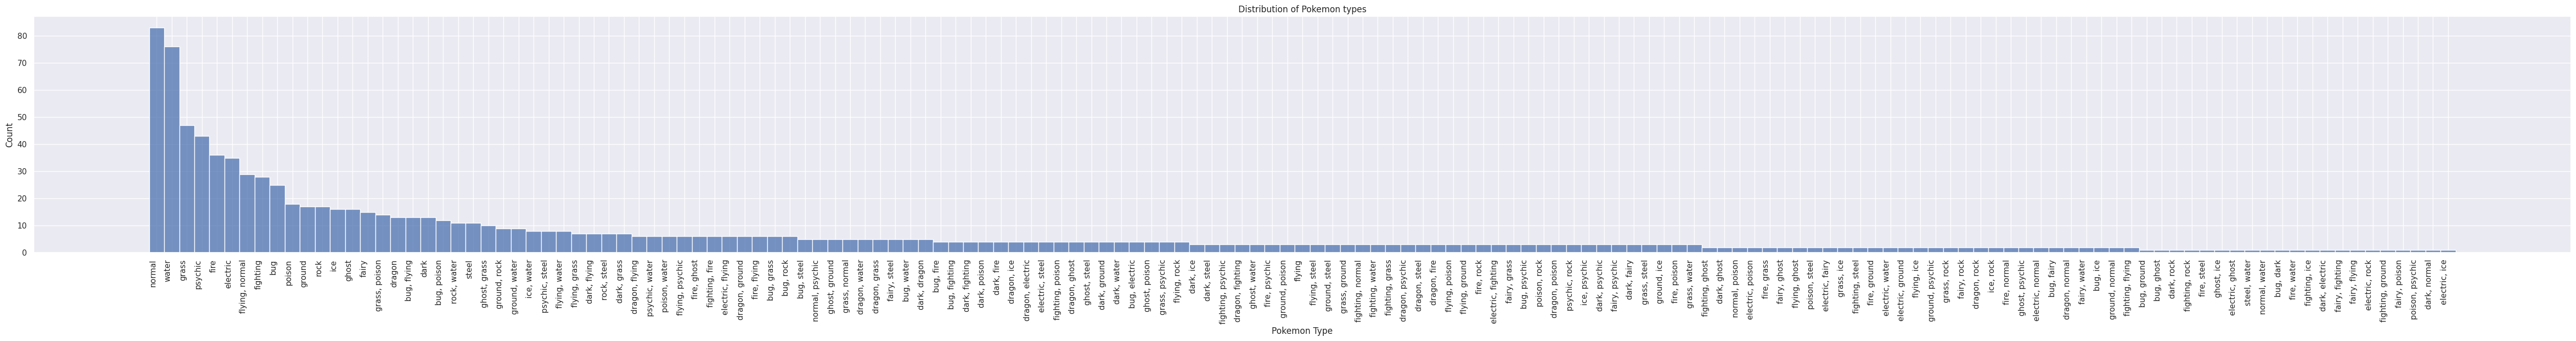

In [17]:
df_uniq_names = df.drop_duplicates(subset = ['Name'])
type_counts = df_uniq_names['Type'].value_counts().reset_index()

plt.figure(figsize=(64, 6))

plt.title("Distribution of Pokemon types")
plt.xlabel("Pokemon Type")
plt.ylabel("Count")

sns.histplot(data = type_counts, x = "Type", weights = 'count')
plt.xticks(rotation=90, ha='right')

plt.show()

3D Scatter Plot of Pokémon Stats

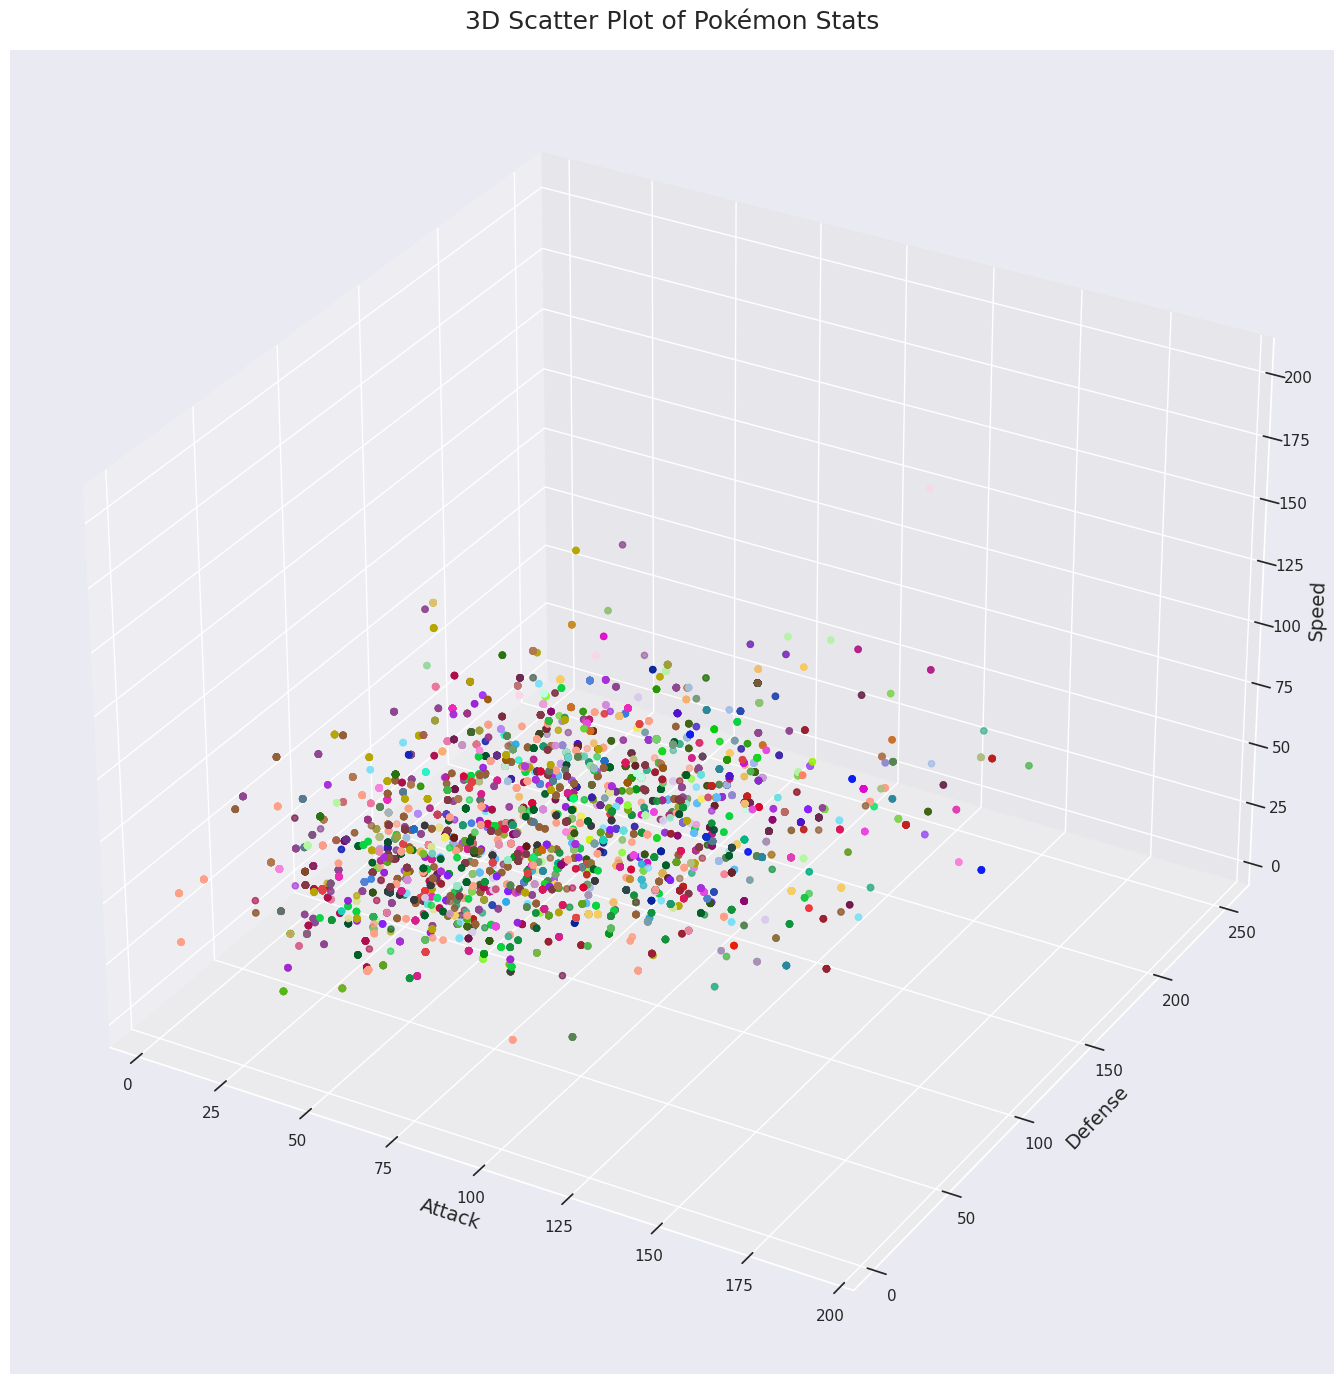

In [18]:
x = df['Att']
y = df['Def']
z = df['Spd']
colors = df['Type'].apply(lambda t: ('#' + md5(bytes(t, encoding = 'ascii')).hexdigest()[:6]))

fig = plt.figure(figsize = (16, 14))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x, y, z, c = colors)
ax.set_xlabel("Attack", fontsize=14)
ax.set_ylabel("Defense", fontsize=14)
ax.set_zlabel("Speed", fontsize=14)
ax.set_title("3D Scatter Plot of Pokémon Stats", fontsize=18, pad=15)

plt.tight_layout()
plt.show()


PCA

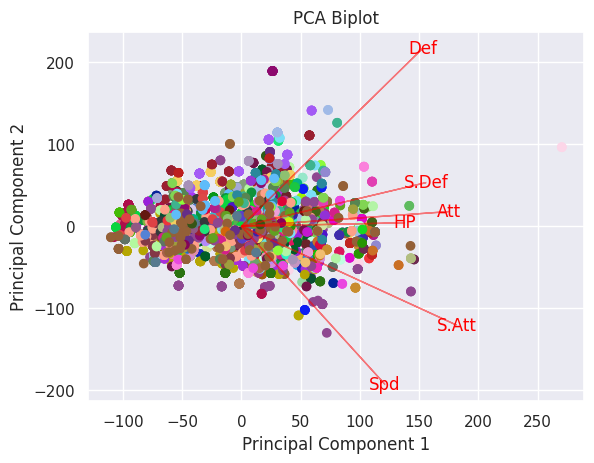

In [19]:
colors = df.dropna(axis = 'rows')['Type'].apply(lambda t: ('#' + md5(bytes(t, encoding = 'ascii')).hexdigest()[:6]))

_df = df.loc[:, ~df.columns.isin(['Generation', 'Type', 'Label Type'])]
_df = _df.set_index('Name')
_df = _df.dropna(axis = 'rows')

pca = PCA()
components = pca.fit_transform(_df)

components_df = pd.DataFrame(
    data = components,
    columns = [f'PC{i + 1}' for i, val in enumerate(_df.columns)],
    index = _df.index
)

fig, ax  = plt.subplots()

plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

scaleX = 1.0 / (components_df['PC1'].max() - components_df['PC1'].min())
scaleY = 1.0 / (components_df['PC2'].max() - components_df['PC2'].min())

scatter = plt.scatter(components_df['PC1'], components_df['PC2'], c = colors)

for i, colname in enumerate(_df.columns):
  plt.arrow(0, 0, pca.components_[0, i] / scaleX, pca.components_[1, i] / scaleY, color = 'red', alpha = 0.5)
  plt.text(pca.components_[0, i] / scaleX, pca.components_[1, i] / scaleY, colname, color = 'red', ha = 'center', va = 'center')

Pearson correlations matrix

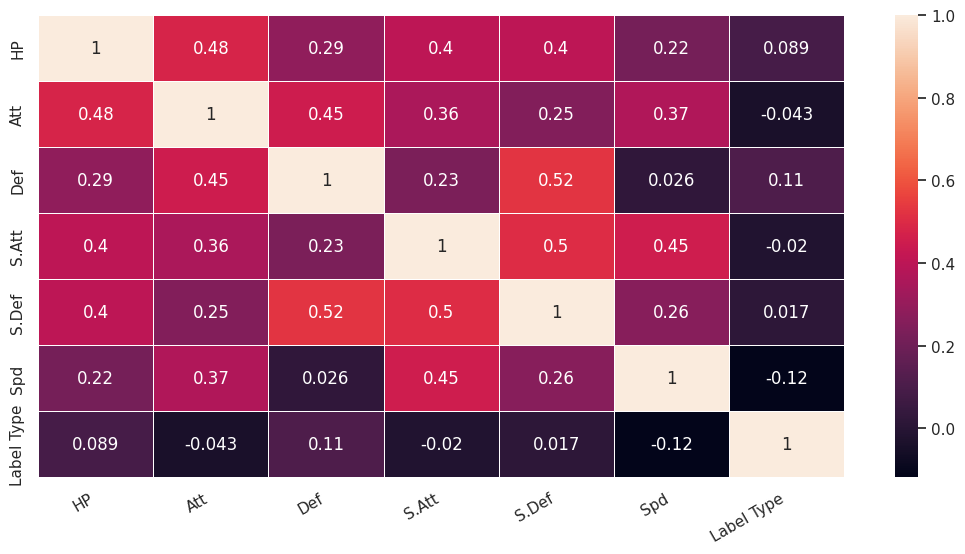

In [20]:
corrmat = df[['HP', 'Att', 'Def', 'S.Att', 'S.Def', 'Spd', 'Label Type']].corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.7)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

## 3. Machine learning model

In [21]:
_df = df.dropna(axis = 'rows')

X = _df[['Def', 'S.Att', 'Spd', 'Att', 'HP']]
y = _df['S.Def']

model = RandomForestRegressor()
score = cross_val_score(model, X, y, cv = 10)
print(f'Mean cross validation score: {score.mean()}')

Mean cross validation score: 0.9814451491617115


In [22]:
model.fit(X, y)

RandomForestRegressor()

In [23]:
missing_sdef = df[df['S.Def'].isna()].copy()

X_pred = missing_sdef[['Def', 'S.Att', 'Spd', 'Att', 'HP']]
y_pred = model.predict(X_pred).astype(int)


missing_sdef['S.Def'] = y_pred
missing_sdef

# Check predicted values on: https://bulbapedia.bulbagarden.net/

,Name,Type,HP,Att,Def,S.Att,S.Def,Spd,Generation,Label Type
2105,Caterpie,bug,45,30,35,20,20,45,rb,0
2106,Metapod,bug,50,20,55,25,25,30,rb,0
2107,Butterfree,"bug, flying",60,45,50,80,80,70,rb,6
2108,Weedle,"bug, poison",40,35,30,20,20,50,rb,10
2109,Kakuna,"bug, poison",45,25,50,25,25,35,rb,10
2110,Beedrill,"bug, poison",65,80,40,45,80,75,rb,10
2111,Paras,"bug, grass",35,70,55,55,57,25,rb,8
2112,Parasect,"bug, grass",60,95,80,80,62,30,rb,8
2113,Venonat,"bug, poison",60,55,50,40,55,45,rb,10
2114,Venomoth,"bug, poison",70,65,60,90,75,90,rb,10
